In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dictionary to categorize ppi items to product categories similar to all_products.csv
ppi_to_category = {
    'Farm-level cattle': 'Animal Products',
    'Wholesale beef': 'Animal Products',
    'Farm-level eggs': 'Animal Products',
    'Wholesale poultry': 'Animal Products',
    'Wholesale pork': 'Animal Products',
    'Farm-level milk': 'Dairy Products',
    'Wholesale dairy': 'Dairy Products',
    'Farm-level fruit': 'Fruits',
    'Farm-level wheat': 'Grains',
    'Wholesale wheat flour': 'Grains'
}

In [3]:
# Read ppi_change CSV file
ppi_data= pd.read_csv('ppi_change.csv')

In [4]:
# Categorize values from the ppi_item feature to a naming similar in the all_products CSV file 'Category' feature
ppi_data = ppi_data.replace({"ppi_item": ppi_to_category})

# Remove values who can't be placed in a similar category
ppi_data = ppi_data.loc[(ppi_data['ppi_item']!='Unprocessed foodstuffs and feedstuffs') & (ppi_data['ppi_item']!='Processed foods and feeds') & (ppi_data['ppi_item']!='Finished consumer foods') & (ppi_data['ppi_item']!='Farm-level soybeans') & (ppi_data['ppi_item']!='Wholesale fats and oils') & (ppi_data['ppi_item']!='Farm-level vegetables')]

In [5]:
# Group ppi_data df on ppi item and year features
# Get the mean for the ppi price change for ppi item and year
ppi_data=ppi_data.groupby(['ppi_item','year'])['ppi_annual_change_in_perc'].mean().reset_index()

In [6]:
# Make percentage values in ppi change feature decimal percentages by dividing through 100
ppi_data['ppi_annual_change_in_perc'] = ppi_data['ppi_annual_change_in_perc']/100

# Show first five rows of df
ppi_data.head()

,ppi_item,year,ppi_annual_change_in_perc
0,Animal Products,1974,-0.0530
1,Animal Products,1975,0.1164
2,Animal Products,1976,-0.0446
3,Animal Products,1977,-0.0154
4,Animal Products,1978,0.1718


In [7]:
# Read all_products CSV file
product_data= pd.read_csv('all_products.csv')

# Show first five rows of df
product_data.head()

,product_name,year,month,us_city_average_retail_price,category
0,American Cheese,1984,1,2.485,Dairy Products
1,American Cheese,1984,2,2.495,Dairy Products
2,American Cheese,1984,3,2.493,Dairy Products
3,American Cheese,1984,4,2.501,Dairy Products
4,American Cheese,1984,5,2.472,Dairy Products


In [8]:
# Group product_data df on category and year features
# Get the mean for the food price for food category and year
product_data=product_data.groupby(['category','year'])['us_city_average_retail_price'].mean().reset_index()

# Show first five rows of df
product_data.head()

,category,year,us_city_average_retail_price
0,Animal Products,1980,1.597490
1,Animal Products,1981,1.659278
2,Animal Products,1982,1.703961
3,Animal Products,1983,1.672465
4,Animal Products,1984,1.699213


In [9]:
# Set index of dataframe to category, product_name, year & month features
product_data = product_data.set_index(['category', 'year'])

# Get difference in percentage of product price with the price the year prior 
# Reset index back to original index
product_data = product_data.pct_change().reset_index()

In [10]:
# Left join average inflation data on year & month
product_data = pd.merge(product_data, ppi_data,  how='left', left_on=['category', 'year'], right_on=['ppi_item', 'year'])
product_data = product_data.drop(columns=['ppi_item'], axis=1)

# Show first five rows of product_data df
product_data.head()

,category,year,us_city_average_retail_price,ppi_annual_change_in_perc
0,Animal Products,1980,NaN,-0.0068
1,Animal Products,1981,0.038678,0.0206
2,Animal Products,1982,0.026929,0.0046
3,Animal Products,1983,-0.018484,-0.0310
4,Animal Products,1984,0.015993,0.0370


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


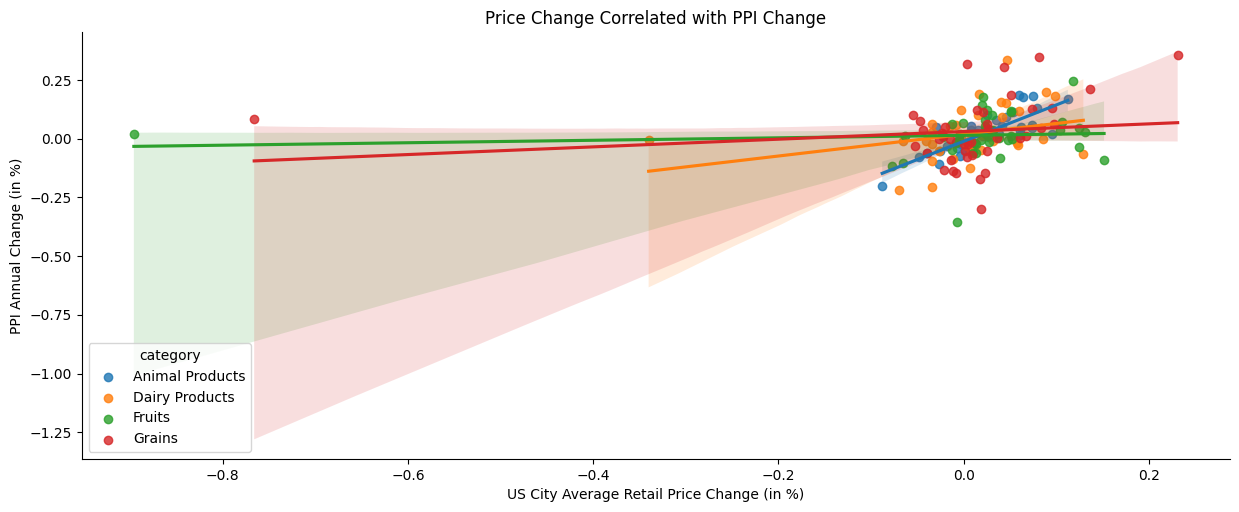

In [11]:
# Set up the plot by specifying the features and plot properties
ax = sns.lmplot(x='us_city_average_retail_price', y='ppi_annual_change_in_perc', data=product_data, hue="category", height= 5, aspect = 2.5, legend_out=False)

# Specify axis label names
ax.set(xlabel='US City Average Retail Price Change (in %)',
       ylabel='PPI Annual Change (in %)',
       title='Price Change Correlated with PPI Change',
       )

# Display scatterplot
plt.show()